# Bio2Byte - Single Sequence Predictions

#### **Goal: Compute and vizualize the overall biophysical behavior of a single protein using the b2btools.**

The following code will:
0. Install the b2btools and the dependencies.
1. Upload the single sequence(s) to study.
2. Predict the biophysical properties of input sequences using the bio2byte predictors:
      *   Backbone and sidechain dynamics (DynaMine)
      *   Conformational propensities (sheet, helix, coil, polyproline II) (DynaMine)
      *   Early folding propensities (EFoldMine)
      *   Disorder propensities (DisoMine)
      *   Beta aggregation propensity (AgMata)
      *   Phase seperation propensity (PPser) 
3. Compute 2D plots of the biophysical behaviour.
4. Plot the predicted biophysical values on the proteins 3D structure.
5. Download your results.

**Check out our webserver: [online b2BTools](https://bio2byte.be/b2btools/)**

In [2]:
#@title 0. Install the b2btools and the dependencies
#@markdown Please be patient, this can take several minutes.
%%capture

!pip install b2bTools==3.0.5 py3Dmol biopython

import os
import json
from google.colab import files
from b2bTools import SingleSeq
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

if not os.path.exists("/content/results"):
    os.mkdir('/content/results')

## 1. Import your data
You can choose between 2 methods:

1.   Paste your protein sequence(s) in cell 1.1 and then run the cell
2.   Upload your fasta file with your protein sequence(s) in cell 1.2 after running the cell 

In [4]:
#@title 1.1. Input protein sequence(s)
#@markdown Fill in your protein sequence(s) below and then run the cell
%%capture

#@markdown **🚨⚠️ IMPORTANT input file size limits:**
#@markdown * Dynamine (dynamics and secondary structure): min 5 residues per sequence
#@markdown * Disomine (disorder): min 5 residues per sequence
#@markdown * EfoldMine (early folding): min 5 residues per sequence
#@markdown * AgMata (beta-aggregation): min 5 residues per sequence
#@markdown * PSP (phase separation): min 20, max 3000 residues per sequence

#@markdown Query sequence 1:
name_1 = 'Rhodopsin_human' #@param {type:"string"}
sequence_1 = 'MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVLGGFTSTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLAGWSRYIPEGLQCSCGIDYYTLKPEVNNESFVIYMFVVHFTIPMIIIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWVPYASVAFYIFTHQGSNFGPIFMTIPAFFAKSAAIYNPVIYIMMNKQFRNCMLTTICCGKNPLGDDEASATVSKTETSQVAPA' #@param {type:"string"}

#@markdown Query sequence 2:
name_2 = '' #@param {type:"string"}
sequence_2 = '' #@param {type:"string"}

#@markdown Query sequence 3:
name_3 = '' #@param {type:"string"}
sequence_3 = '' #@param {type:"string"}

#@markdown Query sequence 4:
name_4 = '' #@param {type:"string"}
sequence_4 = '' #@param {type:"string"}

#@markdown Query sequence 5:
name_5 = '' #@param {type:"string"}
sequence_5 = '' #@param {type:"string"}

fasta = f'>{name_1}\n{sequence_1}\n'

if sequence_2 != '':
    fasta += f'>{name_2}\n{sequence_2}\n'
if sequence_3 != '':
    fasta += f'>{name_3}\n{sequence_3}\n'
if sequence_4 != '':
    fasta += f'>{name_4}\n{sequence_4}\n'
if sequence_5 != '':
    fasta += f'>{name_5}\n{sequence_5}\n'
    
input_fasta = "/content/input_example1.fasta"
with open(input_fasta, "w") as f:
  f.write(fasta)

In [ ]:
#@title 1.2 Upload protein sequence(s)
#@markdown Run this cell and click on "Choose Files" to browse your computer and select your fasta file containing the protein sequence(s)

#@markdown **🚨⚠️ IMPORTANT input file size limits:**
#@markdown * Dynamine (dynamics and secondary structure): min 5 residues per sequence
#@markdown * Disomine (disorder): min 5 residues per sequence
#@markdown * EfoldMine (early folding): min 5 residues per sequence
#@markdown * AgMata (beta-aggregation): min 5 residues per sequence
#@markdown * PSP (phase separation): min 20, max 3000 residues per sequence

#@markdown **🚨⚠️ IMPORTANT input file format:**
#@markdown The file must be in fasta format.

uploaded = files.upload()
for fn in uploaded.keys():
    print('You have uploaded the file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    input_fasta = fn

In [37]:
#@title 2. Select the predictors you want to use and run them
#@markdown Select the predictors to be executed and run this cell.
%%capture

#@markdown ### DynaMine predictor tool
#@markdown >Fast predictor of protein backbone dynamics using only sequence information as input. 
#@markdown >The version here also predicts side-chain dynamics and secondary structure predictors 
#@markdown >using the same principle.

#@markdown **Prediction values included**: `backbone`, `sidechain`, `helix`, `ppII`, `coil`, and `sheet`

DynaMine = True #@param {type:"boolean"}

#@markdown ### DisoMine predictor tool
#@markdown >Predicts protein disorder with recurrent neural networks not directly 
#@markdown >from the amino acid sequence, but instead from more generic predictions of key 
#@markdown >biophysical properties, here protein dynamics, secondary structure 
#@markdown >and early folding.

#@markdown **Prediction values included**: `disoMine`

DisoMine = True #@param {type:"boolean"}

#@markdown ### EFoldMine predictor tool
#@markdown >Predicts from the primary amino acid sequence of a protein, 
#@markdown >which amino acids are likely involved in early folding events.

#@markdown **Prediction values included**: `earlyFolding`

EfoldMine = True #@param {type:"boolean"}

#@markdown ### AgMata predictor tool
#@markdown >Single-sequence based predictor of protein regions that are likely 
#@markdown >to cause beta-aggregation.

#@markdown **Prediction values included**: `agmata`

AgMata = True #@param {type:"boolean"}

#@markdown ### PSPer predictor tool
#@markdown >PSP (Phase Separating Protein) predicts whether a protein is likely to phase-separate with a 
#@markdown >particular mechanism involving RNA interacts (FUS-like proteins). It will highlight the regions
#@markdown > in your protein that are involved mechanistically, and provide an overall score.
#@markdown >to cause beta-aggregation.

#@markdown **Prediction values included**: `PSPer`

PsPer = True #@param {type:"boolean"}

#@markdown **Don't forget to run the cell after ticking the boxes**
tools = []
nb_tools = 0
if DynaMine:
    tools.append("dynamine")
    nb_tools +=6
if DisoMine:
    tools.append("disomine")
    nb_tools +=1
if EfoldMine:
    tools.append("efoldmine")
    nb_tools +=1
if AgMata:
    tools.append("agmata")
    nb_tools +=1
if PsPer:
    tools.append("psp")

single_seq = SingleSeq(input_fasta)
single_seq.predict(tools=tools)

all_predictions = single_seq.get_all_predictions()
keys = list(all_predictions.keys())

max_seq_len = max([len(pred['seq']) for pred in all_predictions.values()])

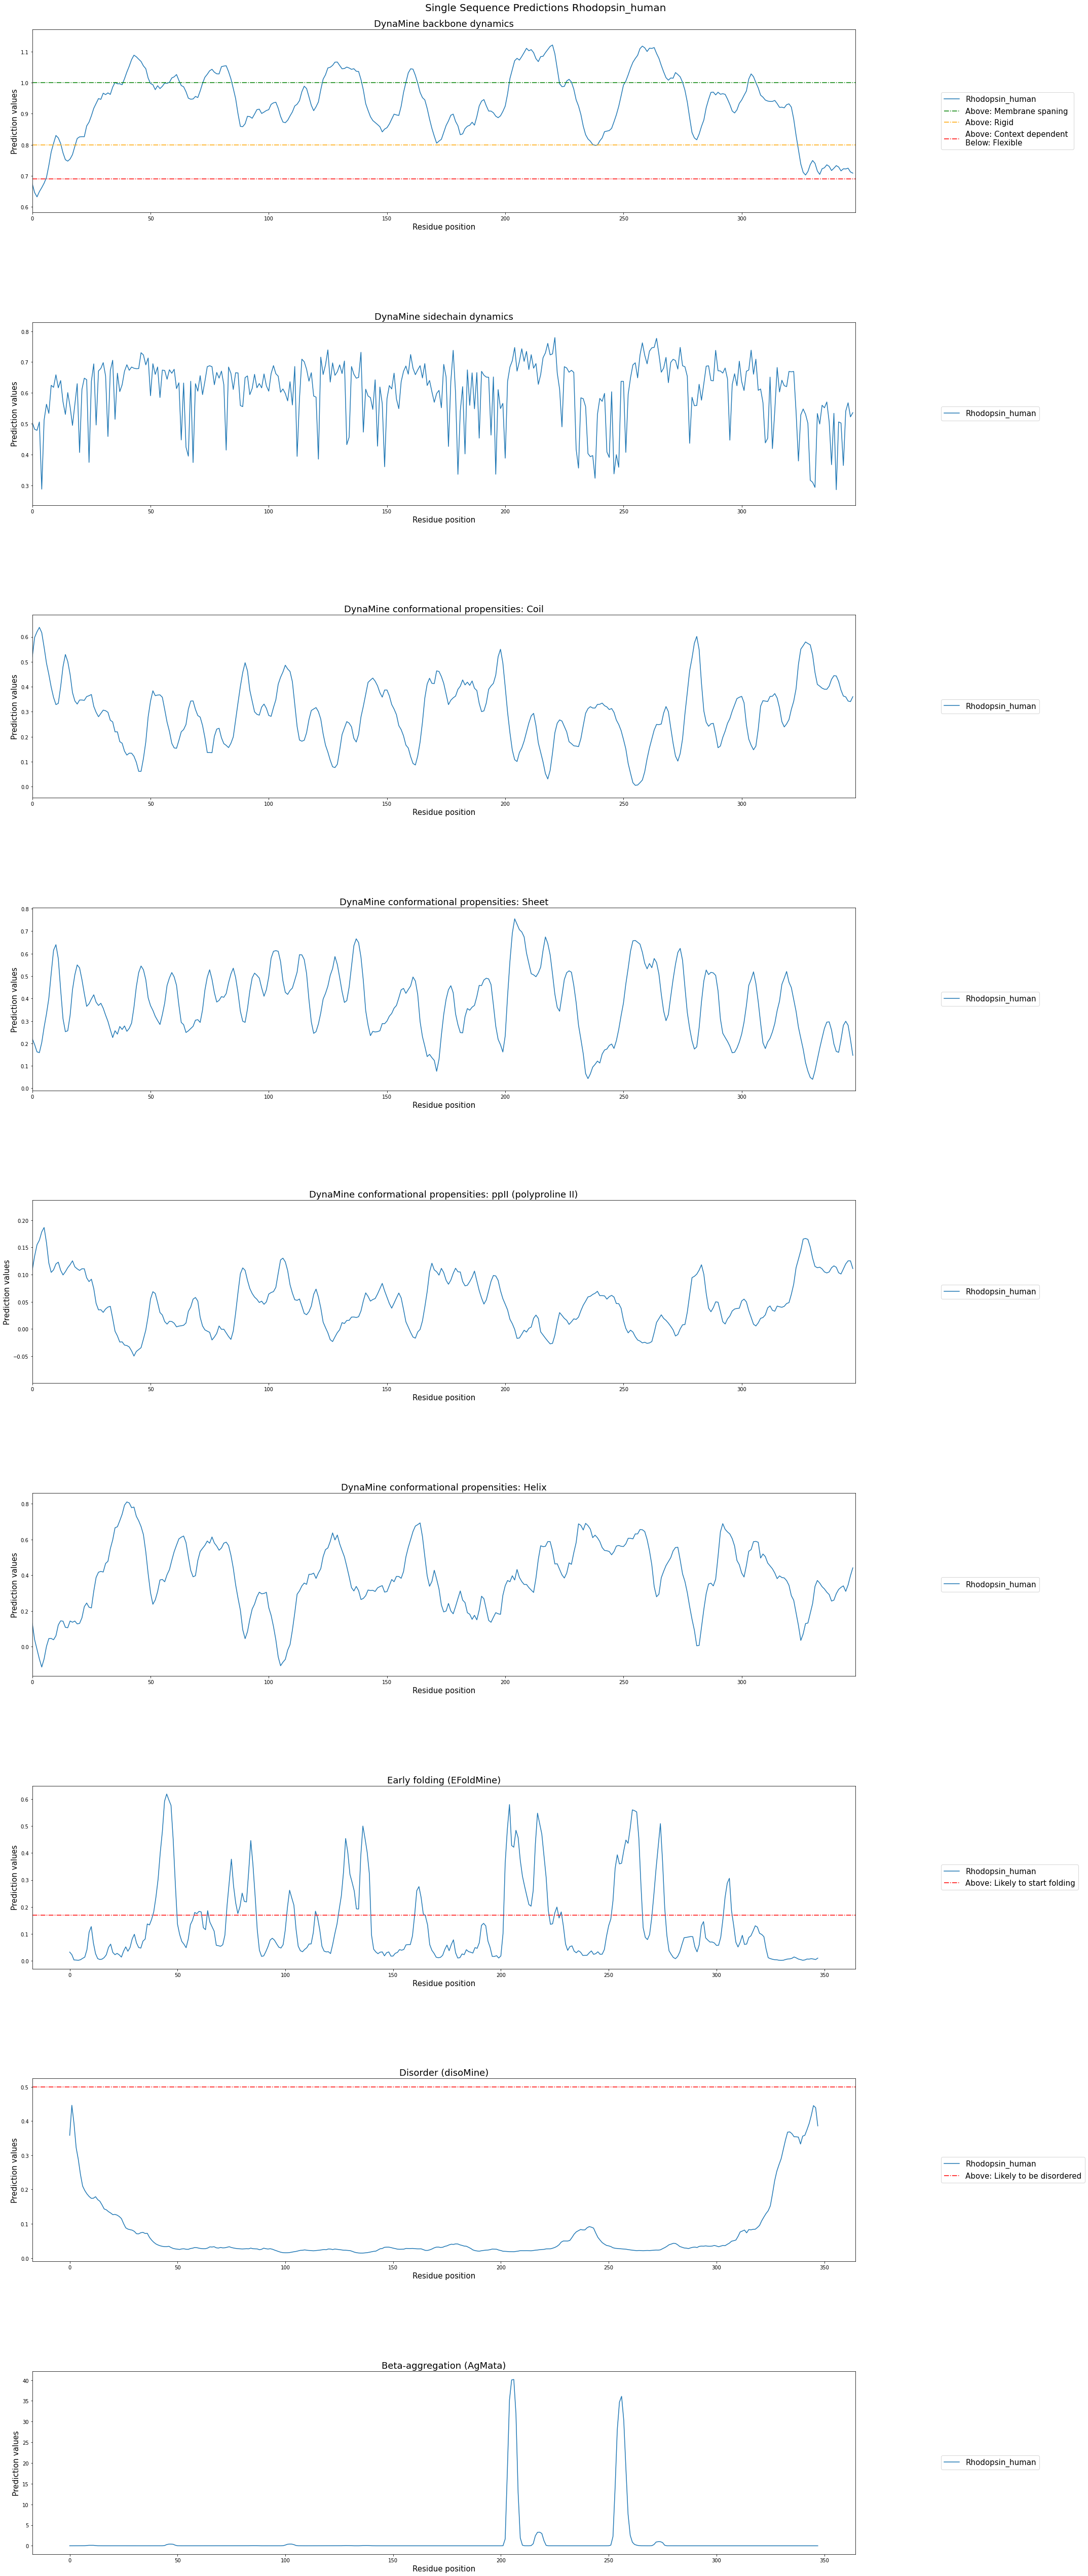

In [9]:
#@title 3.1 Plot the single sequence predictions (all besides PSPer)
#@markdown The predictions reflect 'emerging' properties, so what the sequence 
#@markdown is capable of, not necessarily what it will do in a particular 
#@markdown context, for example when it adopts a specific fold.

#@markdown #### DynaMine backbone dynamics
#@markdown > Values above 0.8 indicate rigid conformations, 
#@markdown > values above 1.0 membrane spanning regions, 
#@markdown > values below 0.69 flexible regions. 
#@markdown > Values between 0.69-0.80 are 'context' dependent and capable of
#@markdown > being either rigid or flexible.

#@markdown #### DynaMine sidechain dynamics
#@markdown > Higher values mean more likely rigid. 
#@markdown > These values are highly dependent on the amino acid type 
#@markdown > (i.e. a Trp will be rigid, an Asp flexible).

#@markdown #### DynaMine conformational propensities (sheet, helix, coil, ppII (polyproline II))
#@markdown > Higher values indicate higher propensities.

#@markdown #### EFoldMine earlyFolding propensity
#@markdown > Values above 0.169 indicate residues that are likely to start 
#@markdown > the protein folding process, based on only local interactions 
#@markdown > with other amino acids.

#@markdown #### DisoMine disorder
#@markdown >  Values above 0.5 indicate that this is likely a disordered residue.

#@markdown #### AgMata beta aggregation
#@markdown > These values are divided by a factor of 20 from the original. 
#@markdown > Peaks indicate residues likely to be involved in beta-sheet 
#@markdown > aggregation.

for seq_key in keys:

    predictions = all_predictions[seq_key]
    x_position = range(len(predictions['seq']))
    residues_count = len(predictions['seq'])

    fig, axs = plt.subplots(nb_tools)
    fig.suptitle(f'Single Sequence Predictions {seq_key}', fontsize=20)
    fig.set_figwidth(30)
    fig.set_figheight(8*nb_tools)

    number = 0

    if DynaMine:

        ax1 = axs[number]
        ax2 = axs[number+1]
        ax3 = axs[number+2]
        ax4 = axs[number+3]
        ax5 = axs[number+4]
        ax6 = axs[number+5]
        number+=6

        backbone_pred = predictions['backbone']
        coil_pred = predictions['coil']
        sheet_pred = predictions['sheet']
        ppII_pred = predictions['ppII']
        helix_pred = predictions['helix']
        sidechain_pred = predictions['sidechain']

        ax1.plot(x_position, backbone_pred, label=seq_key)
        ax1.set_title('DynaMine backbone dynamics', fontsize=18)
        ax1.axis([0, residues_count, min(backbone_pred)-0.05, max(backbone_pred)+0.05])
        ax1.axhline(y=1.0, color='green', linewidth= 1.5, linestyle='-.', label="Above: Membrane spaning") #Membrane spaning
        ax1.axhline(y=0.8, color='orange', linewidth= 1.5, linestyle='-.', label="Above: Rigid") #Membrane spaning
        if min(backbone_pred)-0.05 < 0.69:
            ax1.axhline(y=0.69, color='red', linewidth= 1.5, linestyle='-.', label="Above: Context dependent \nBelow: Flexible") #context dependent (either rigide or flexible)
        ax1.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

        ax2.plot(x_position, sidechain_pred, label=seq_key)
        ax2.set_title('DynaMine sidechain dynamics', fontsize=18)
        ax2.axis([0, residues_count, min(sidechain_pred)-0.05, max(sidechain_pred)+0.05])
        ax2.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

        ax3.plot(x_position, coil_pred, label=seq_key)
        ax3.set_title('DynaMine conformational propensities: Coil', fontsize=18)
        ax3.axis([0, residues_count, min(coil_pred)-0.05, max(coil_pred)+0.05])
        ax3.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

        ax4.plot(x_position, sheet_pred, label=seq_key)
        ax4.set_title('DynaMine conformational propensities: Sheet', fontsize=18)
        ax4.axis([0, residues_count, min(sheet_pred)-0.05, max(sheet_pred)+0.05])
        ax4.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

        ax5.set_title('DynaMine conformational propensities: ppII (polyproline II)', fontsize=18)
        ax5.plot(x_position, ppII_pred, label=seq_key)
        ax5.axis([0, residues_count, min(ppII_pred)-0.05, max(ppII_pred)+0.05])
        ax5.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

        ax6.set_title('DynaMine conformational propensities: Helix', fontsize=18)
        ax6.plot(x_position, helix_pred, label=seq_key)
        ax6.axis([0, residues_count, min(helix_pred)-0.05, max(helix_pred)+0.05])
        ax6.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)    

    if EfoldMine:
      ax7 = axs[number]
      number +=1
      earlyFolding_pred = predictions['earlyFolding'] 
      ax7.plot(x_position, earlyFolding_pred, label=seq_key)
      ax7.set_title('Early folding (EFoldMine)', fontsize=18)
      ax7.axhline(y=0.169, color='red', linewidth= 1.5, linestyle='-.', label="Above: Likely to start folding") #above: likely start protein folding process
      ax7.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

    if DisoMine:
      ax8 = axs[number]
      number +=1
      disomine_pred = predictions['disoMine']
      ax8.plot(x_position, disomine_pred, label=seq_key)
      ax8.set_title('Disorder (disoMine)', fontsize=18)
      ax8.axhline(y=0.5, color='red', linewidth= 1.5, linestyle='-.', label="Above: Likely to be disordered") #above: likely disordered   
      ax8.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)
    
    if AgMata:
      ax9 = axs[number]
      agmata_pred = predictions['agmata']
      ax9.plot(range(len(agmata_pred)), agmata_pred, label=seq_key)
      ax9.set_title('Beta-aggregation (AgMata)', fontsize=18)
      ax9.legend(ncol=1, bbox_to_anchor =(1.1,0.5), loc='center left', fontsize=15)

    for ax in axs:
      ax.set_xlabel("Residue position", fontsize=15)
      ax.set_ylabel("Prediction values", fontsize=15)

    plt.tight_layout()
    
    fig.subplots_adjust(top=0.88+(nb_tools/100), hspace = 0.6)
    plt.savefig(f'/content/results/single_sequence_predictons_{seq_key}.png')
    plt.show()

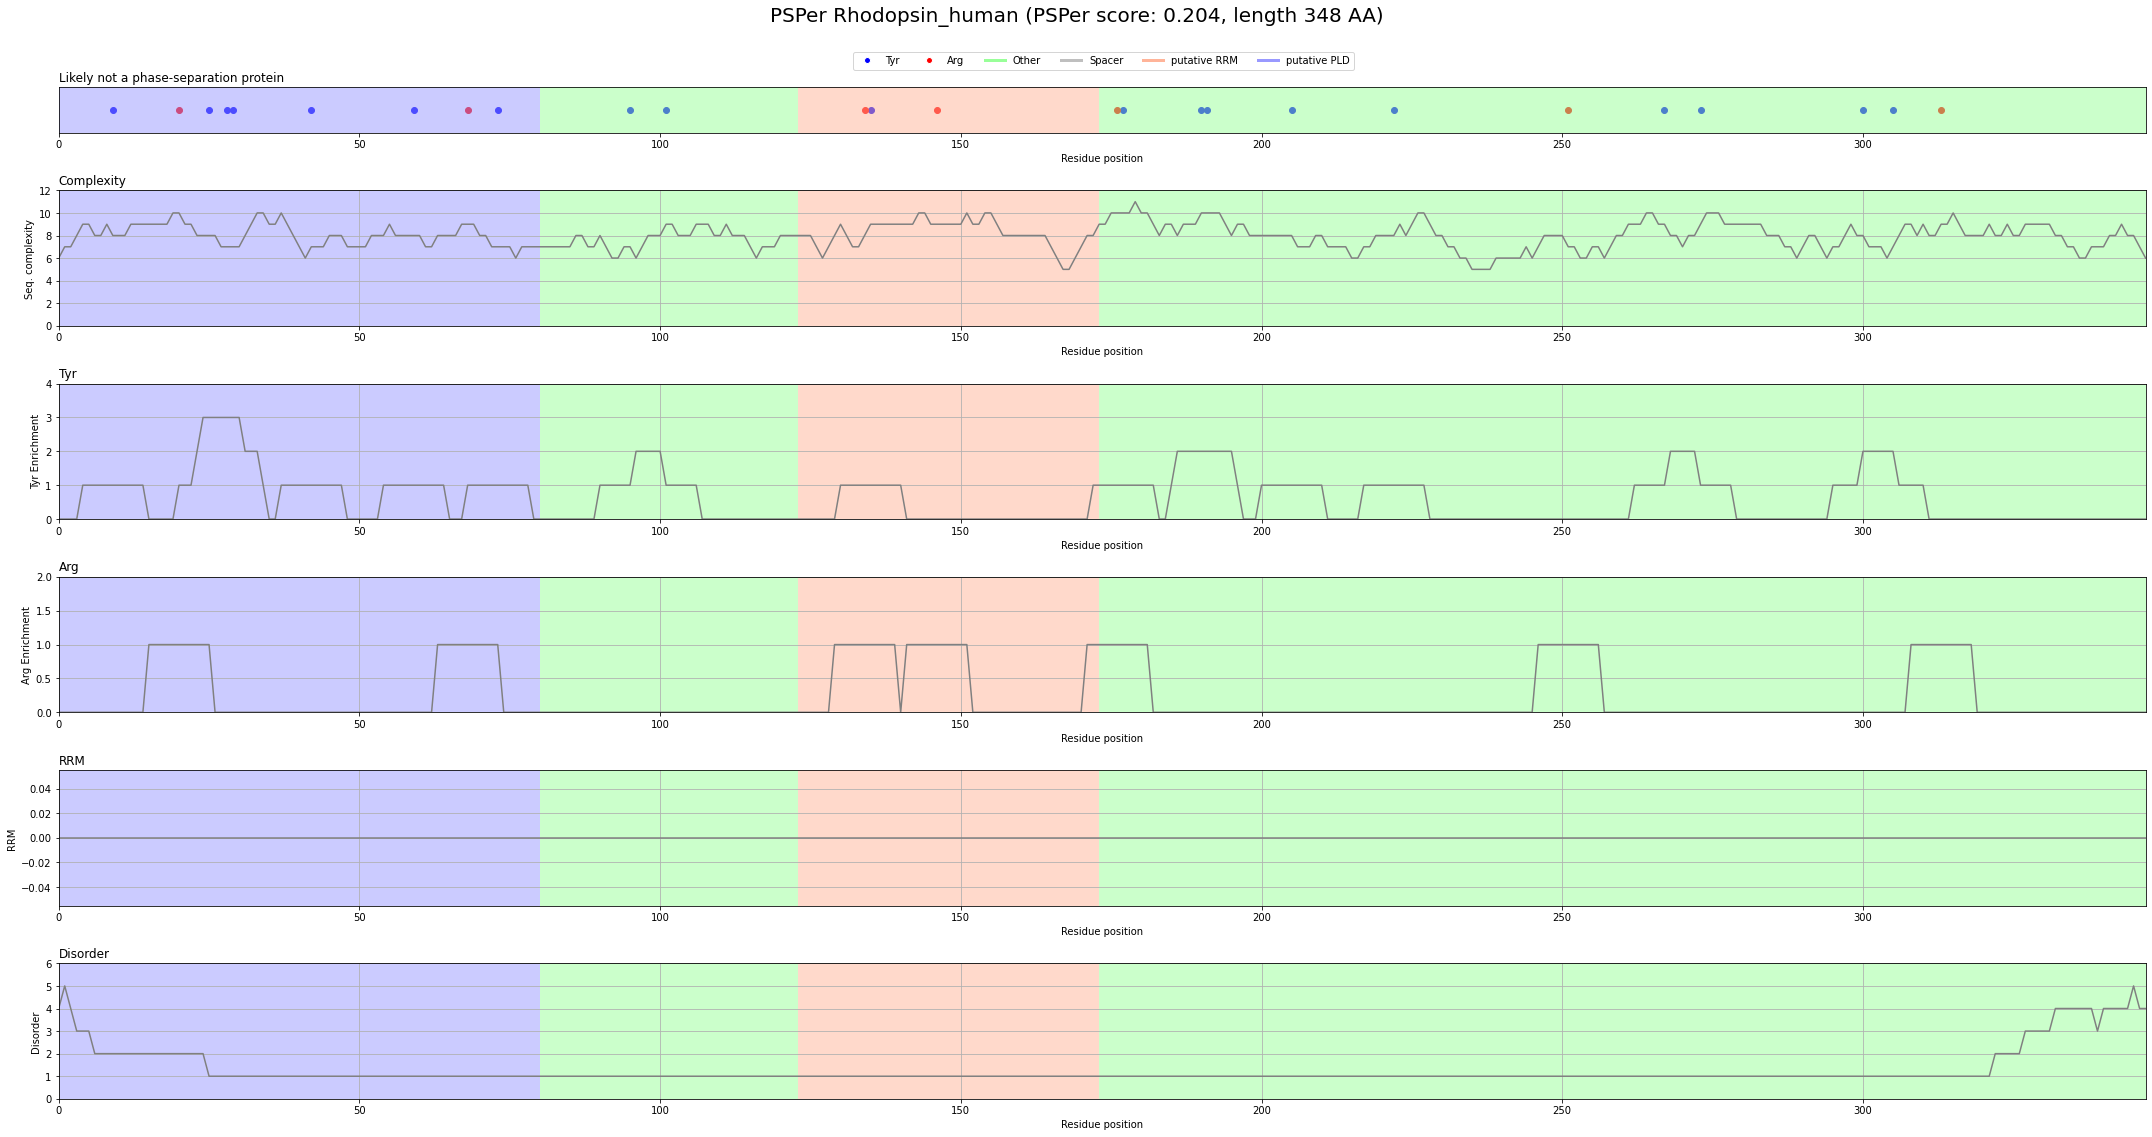

In [6]:
#@title 3.2.Plot PSPer
#@markdown PSP (Phase Separating Protein) enables you to predict whether a 
#@markdown protein is likely to phase-separate with a particular mechanism 
#@markdown involving RNA interacts (FUS-like proteins). 
#@markdown It will highlight the regions in your protein that are involved 
#@markdown mechanistically, and provide an overall score.

for seq_key in keys:
    predictions = all_predictions[seq_key]
    sequence = predictions['seq']
    x = range(len(sequence))

    tyr_x = []
    tyr_y = []
    arg_x = []
    arg_y = []
    
    for ind, residue in enumerate(sequence):
        if residue == 'Y':
            tyr_x.append(ind)
            tyr_y.append(0.5)
        if residue == 'R':
            arg_x.append(ind)
            arg_y.append(0.5)

    viterbi_path = predictions['viterbi']
    color_map = lambda step: '#ffb499' if step == ' RRM' else '#9999ff' if step == ' PLD' else '#bfbfbf' if step == ' SPACER' else '#99ff99' if step == ' OTHER' else '#fff'
    viterbi_colors = list(map(color_map, viterbi_path))

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, gridspec_kw={'height_ratios': [1, 3, 3, 3, 3, 3]})
    fig.set_figwidth(30)
    fig.set_figheight(15)
    fig.suptitle(f'PSPer {seq_key} (PSPer score: {predictions["protein_score"]:2.3}, length {len(sequence)} AA)', size=20, y=1.05)
    
    # AX1
    if predictions["protein_score"] >= 0.5611191832364677:
        ax1.set_title("Likely a phase-separation protein", loc='left')
    else:
        ax1.set_title("Likely not a phase-separation protein", loc='left')

    ax1.set_xlim([0, len(sequence) - 1])
    ax1.set_ylim([0, 1])
    ax1.scatter(tyr_x, tyr_y, marker="o", color="blue")
    ax1.scatter(arg_x, arg_y, marker="o", color="red")
    ax1.axes.yaxis.set_visible(False)
    ax1.set_xlabel('Residue position')
    
    # Complexity
    ax2.plot(x, predictions['complexity'], color='#808080')
    ax2.set_title('Complexity', loc='left')
    ax2.set_ylabel('Seq. complexity')
    ax2.set_xlabel('Residue position')
    ax2.set_xlim([0, len(sequence) - 1])
    ax2.set_ylim([0, max(predictions['complexity']) + 1])
    ax2.grid()

    # Tyr Enrichment
    ax3.plot(x, predictions['tyr'], color='#808080')
    ax3.set_title('Tyr', loc='left')
    ax3.set_ylabel('Tyr Enrichment')
    ax3.set_xlabel('Residue position')
    ax3.set_xlim([0, len(sequence) - 1])
    ax3.set_ylim([0, max(predictions['tyr']) + 1])
    ax3.grid()

    # Arg Enrichment
    ax4.plot(x, predictions['arg'], color='#808080')
    ax4.set_title('Arg', loc='left')
    ax4.set_ylabel('Arg Enrichment')
    ax4.set_xlabel('Residue position')
    ax4.set_xlim([0, len(sequence) - 1])
    ax4.set_ylim([0, max(predictions['arg']) + 1])
    ax4.grid()

    # RRM 
    ax5.plot(x, predictions['RRM'], color='#808080')
    ax5.set_title('RRM', loc='left')
    ax5.set_ylabel('RRM')
    ax5.set_xlabel('Residue position')
    ax5.set_xlim([0, len(sequence) - 1])
    ax5.grid()

    # Disorder
    ax6.plot(x, predictions['disorder'], color='#808080')
    ax6.set_title('Disorder', loc='left')
    ax6.set_ylabel('Disorder')
    ax6.set_xlabel('Residue position')
    ax6.set_xlim([0, len(sequence) - 1])
    ax6.set_ylim([0, max(predictions['disorder']) + 1])
    ax6.grid()

    for i in x:
        ax1.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)
        ax2.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)
        ax3.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)
        ax4.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)
        ax5.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)
        ax6.axvspan(i, i+1, facecolor=viterbi_colors[i], alpha=0.5)

    axbox = ax1.get_position()
    
    custom_lines = [
        Line2D([0], [0], color="white", marker='o', markerfacecolor="blue"),
        Line2D([0], [0], color="white", marker='o', markerfacecolor="red"),
        Line2D([0], [0], color='#99ff99', lw=3),
        Line2D([0], [0], color='#bfbfbf', lw=3),
        Line2D([0], [0], color='#ffb499', lw=3),
        Line2D([0], [0], color='#9999ff', lw=3)
    ]
    
    fig.legend(
        custom_lines, 
        ['Tyr', 'Arg', 'Other', 'Spacer', 'putative RRM', 'putative PLD'], 
        loc='center',
        ncol=6,
        bbox_to_anchor=[axbox.x0 + 0.5*axbox.width, axbox.y1 + 0.12], bbox_transform=fig.transFigure
    )
    fig.tight_layout()
    plt.savefig(f'/content/results/psp_{seq_key}.png')
    plt.show()



In [39]:
#@title 4. Plot the predicted biophysical values on the proteins 3D structure
import os 
import urllib.request

#@markdown This cell allow you to visualize the predicted biophysical features on your 3D structures.

#@markdown To do so, follow these steps:

#@markdown 1. Select from where you want to download your 3D structure from (PDB, AlphaFoldDB or your computer):
PDB = True #@param {type:"boolean"}
AlphaFold = False #@param {type:"boolean"}
Upload = False #@param {type:"boolean"}
if Upload:
  uploaded = files.upload()
  for fn in uploaded.keys():
      print('You have uploaded the file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
      structure_file_path = fn

#@markdown 2. Enter the PDB ID if you want to retrieve your 3D structure form the PDB, the Uniprot ID of your protein if you want to retrieve your 3D structure form the AlphaFoldDB or the name of your 3D structure if you upload it:
ID = "5W0P" #@param {type:"string"}
#@markdown 3. Enter the ID of the chain of interest:
chain_interest = "A" #@param {type:"string"}
#@markdown 4. Run this cell by pushing the play button under the title of this cell.

#@markdown 5. Follow the instructions that are printed out under this cell to visualize the predicted biophysical features on your 3D structure.

#@markdown 6. The legend of the color codes is below.


#Download file
if PDB:
  structure_file_path = f'/content/{ID}.pdb'
  urllib.request.urlretrieve(f'https://files.rcsb.org/download/{ID}.pdb', structure_file_path)
elif AlphaFold:
  structure_file_path = f'/content/{ID}.pdb'
  urllib.request.urlretrieve(f'https://alphafold.ebi.ac.uk/files/AF-{ID}-F1-model_v3.pdb', structure_file_path)

from Bio.PDB import PDBParser
from Bio.PDB.PDBIO import PDBIO

#replace b factor values of chain of interest by values predictors
def build_pdb_by_prediction(pdb_file_path, chain_interest, predictions, predictor):
    p = PDBParser()
    structure = p.get_structure("protein of interest", pdb_file_path)

    #get offset and gaps in structure
    offset = 0
    start_found = False
    gaps = []
    gap = False
    lines_b2b = []
    counter = 0
    start = True
    with open(structure_file_path, 'r') as f:
      for line in f:
        line_list = line.split()
        if line_list[0]=="ATOM" and line_list[4]==chain_interest:
          if int(line_list[5]) >= 1 : #enables us to handle offsets and fused proteins
          # if int(line_list[5]) >= 1 and counter <= len(predictions[predictor]): #enables us to handle offsets and fused proteins
            # counter +=1
            # print(counter)
            if start:
              start_pos = int(line_list[5])
              start = False
            position = int(line_list[5]) - 1 #enables us to handle gaps
            residue_object =structure[0][chain_interest][int(line_list[5])]
            for atom in residue_object:
                atom.set_bfactor(round(predictions[predictor][position], 3))
    io = PDBIO()
    stop = position
    io.set_structure(structure[0][chain_interest])
    io.save(f"/content/results/{seq}_{predictor}.pdb")

    print("\n")
    print(f"Download the file {seq}_{predictor}.pdb in the folder 'results' and open it in PyMOL")
    print("Then enter the following command to color your chain of interest in function of the predicted values:")

    return

av_predictors = ['backbone', 'sidechain', 'ppII', 'coil', 'sheet', 'helix', 'earlyFolding', 'disoMine', 'agmata']
for seq in list(all_predictions.keys()):
  print(seq)
  if DynaMine:
      av_predictors = ['backbone', 'sidechain', 'ppII', 'coil', 'sheet', 'helix']
      for predictor in av_predictors:
          path = build_pdb_by_prediction(structure_file_path, chain_interest, all_predictions[seq],predictor)
          if predictor == 'backbone':
                print("color red")
                print("color salmon, b<1.0")
                print("color white, b<0.8")
                print("color blue, b<0.68")
                print("Blue regions are flexible, white regions are context dependent, salmon regions are flexible and red regions are membrane spaning")
          else:
               print("spectrum b, blue_white_red, minimum=0, maximum=1")
  if EfoldMine:
      predictor='earlyFolding'
      path = build_pdb_by_prediction(structure_file_path, chain_interest, all_predictions[seq],predictor)
      print("color red, b>0.1689999")
      print("color blue, b<0.169")
  if DisoMine:
    predictor='disoMine'
    print("color red, b>0.499999")
    print("color blue, b<0.5")
  
  if AgMata:
      predictor='agmata'
      path = build_pdb_by_prediction(structure_file_path, chain_interest, all_predictions[seq],predictor)
      print(print("spectrum b, blue_white_red, minimum=0, maximum=1"))

Rhodopsin_human


Download the file Rhodopsin_human_backbone.pdb in the folder 'results' and open it in PyMOL
Then enter the following command to color your chain of interest in function of the predicted values:
color red
color salmon, b<1.0
color white, b<0.8
color blue, b<0.68
Blue regions are flexible, white regions are context dependent, salmon regions are flexible and red regions are membrane spaning


Download the file Rhodopsin_human_sidechain.pdb in the folder 'results' and open it in PyMOL
Then enter the following command to color your chain of interest in function of the predicted values:
spectrum b, blue_white_red, minimum=0, maximum=1


Download the file Rhodopsin_human_ppII.pdb in the folder 'results' and open it in PyMOL
Then enter the following command to color your chain of interest in function of the predicted values:
spectrum b, blue_white_red, minimum=0, maximum=1


Download the file Rhodopsin_human_coil.pdb in the folder 'results' and open it in PyMOL
Then enter the

In [7]:
#@title 5. Download the results
#@markdown After running this cell you will be able to download the plots as well as the plot 
#@markdown plain results in JSON format to your computer.
%%capture

json.dump(all_predictions, open('/content/results/b2btools_results.json', 'w'), indent=4, sort_keys=True)

!zip -r /content/b2b_tools_results.zip /content/results

files.download("/content/b2b_tools_results.zip")

## Questions? Feedback?

Contact us through our [Feedback](https://www.bio2byte.be/b2btools/feedback) page on the bio2Byte website.

## PyPi repository

Want to try out the b2btools? Download the Bio2Byte's tools package from our PyPi repository: https://pypi.org/project/b2bTools/.

## Citations

- Implementation of the b2btools to study the protein biophysical features and their conservation:
> Kagami, L. P., Orlando, G., Raimondi, D., Ancien, F., Dixit, B., Gavaldá-García, J., Ramasamy, P., Roca-Martínez, J., Tzavella, K., & Vranken, W. (2021). b2bTools: Online predictions for protein biophysical features and their conservation. Nucleic Acids Research, 49(W1), W52–W59. https://doi.org/10.1093/nar/gkab425

- DynaMine:
> Cilia, E., Pancsa, R., Tompa, P., Lenaerts, T., & Vranken, W. F. (2013). From protein sequence to dynamics and disorder with DynaMine. Nature Communications, 4(1), 2741–2741. https://doi.org/10.1038/ncomms3741

- EFoldMine:
> Raimondi, D., Orlando, G., Pancsa, R., Khan, T., & Vranken, W. F. (2017). Exploring the Sequence-based Prediction of Folding Initiation Sites in Proteins. Scientific Reports, 7(1), 8826–8826. https://doi.org/10.1038/s41598-017-08366-3

- Disomine:
> Orlando, G., Raimondi, D., Codicè, F., Tabaro, F., & Vranken, W. (2022). Prediction of Disordered Regions in Proteins with Recurrent Neural Networks and Protein Dynamics. Journal of Molecular Biology, 434(12), 167579. https://doi.org/10.1016/j.jmb.2022.167579

- AgMata:
> Orlando, G., Silva, A., Macedo-Ribeiro, S., Raimondi, D., & Vranken, W. (2020). Accurate prediction of protein beta-aggregation with generalized statistical potentials. Bioinformatics, 36(7), 2076–2081. https://doi.org/10.1093/bioinformatics/btz912

- PSPer:
> Orlando, G., Raimondi, D., Tabaro, F., Codicè, F., Moreau, Y., & Vranken, W. F. (2019). Computational identification of prion-like RNA-binding proteins that form liquid phase-separated condensates. Bioinformatics, 35(22), 4617–4623. https://doi.org/10.1093/bioinformatics/btz274